### Ukázka na datasetu Iris

In [1]:
from sklearn import datasets
data = datasets.load_iris()

In [2]:
from sklearn.decomposition import PCA

In [3]:
X = data["data"]

In [4]:
pca = PCA()
pca.fit(X)
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

Můžeme rovnou říct, jakou úroveň variability chceme zachovat

In [5]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
X_reduced

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

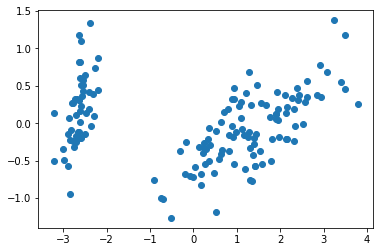

In [6]:
from matplotlib import pyplot as plt
plt.plot(X_reduced[:,0], X_reduced[:,1], marker='o', ls='')

Ze 4 dimenzí jsme se dostali na 2 při zachování téměř 98% variability

### Ukázka na datasetu Titanic

In [7]:
import os
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


data = pd.read_csv(os.path.join("datasets", "04", "titanic", "train.csv"))

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('one_hot', OneHotEncoder(sparse=False))
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, ['Age', 'SibSp', 'Parch', 'Fare']),
    ('cat', cat_pipeline, ['Pclass', 'Sex', 'Embarked']),
])

X = full_pipeline.fit_transform(data)
X.shape

(891, 12)

In [8]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.30366615, 0.23399714, 0.13212067, 0.10914211, 0.07404423,
       0.06099775, 0.04372228])

In [9]:
X_reduced.shape

(891, 7)

Z 12 dimenzí jsme se dostali na 7.

### Ukázka na datasetu MNIST

In [10]:
mnist = datasets.fetch_openml("mnist_784", version=1)

In [15]:
X, y = mnist["data"].to_numpy(), mnist["target"].to_numpy()
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [16]:
X_train.shape

(60000, 784)

In [17]:
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [18]:
X_train_reduced.shape

(60000, 154)

Ze 784 dimenzí jsme se dostali na 154.

In [24]:
from sklearn.svm import SVC
import time

In [26]:
start = time.time()
svc = SVC()
svc.fit(X_train, y_train)
stop = time.time()

score = svc.score(X_test, y_test)

print(f"Score: {score}")
print(f"Time: {stop - start} s")

Score: 0.9792
Time: 157.80572628974915 s


Nyní s redukovaným počtem dimenzí

In [27]:
start = time.time()
svc = SVC()
svc.fit(X_train_reduced, y_train)
stop = time.time()

X_test_reduced = pca.transform(X_test)
score = svc.score(X_test_reduced, y_test)

print(f"Score: {score}")
print(f"Time: {stop - start} s")

Score: 0.9832
Time: 60.56102228164673 s


(pro RandomForest tento postup moc nezafungoval)

### KernelPCA viz prezentace